# PREDICCIÓN DEL RETORNO

# TEMA

In [32]:
# Importamos las librerías
import pandas as pd
import numpy as np
import yfinance as yf
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cycler

In [33]:
# Para que nos ignore los warnings
warnings.filterwarnings("ignore") 

# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [34]:
# Importamos datos de YAHOO FINANCE
yf.download("GOOG")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2023-06-15,123.879997,126.160004,123.139999,125.790001,125.790001,24517100
2023-06-16,126.699997,126.699997,123.790001,124.059998,124.059998,56686800
2023-06-20,123.535004,125.175003,122.830002,123.849998,123.849998,22698000


In [35]:
# Creamos una función para que se cree un DataFrame
'''
def create_dataframe(symbol):
    data = yf.download(symbol)
    df = pd.DataFrame(data)
    return df
'''

'\ndef create_dataframe(symbol):\n    data = yf.download(symbol)\n    df = pd.DataFrame(data)\n    return df\n'

In [36]:
import os
import yfinance as yf
import pandas as pd

def create_dataframe(symbol):
    data = yf.download(symbol)
    df = pd.DataFrame(data)
    
    # Obtener la ruta completa del directorio 'data/raw' en relación al directorio actual del cuaderno
    current_dir = os.getcwd()
    raw_dir = os.path.join(current_dir, '..', 'data', 'raw')
    
    # Crear el directorio 'data/raw' si no existe
    if not os.path.exists(raw_dir):
        os.makedirs(raw_dir)
    
    ''' # Guardar el DataFrame como un archivo CSV en 'data/raw'
    filename = f"{symbol}.csv"
    filepath = os.path.join(raw_dir, filename)
    df.to_csv(filepath, index=False)
    '''
    return df


In [37]:
df= create_dataframe("GOOG")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2023-06-15,123.879997,126.160004,123.139999,125.790001,125.790001,24517100
2023-06-16,126.699997,126.699997,123.790001,124.059998,124.059998,56686800
2023-06-20,123.535004,125.175003,122.830002,123.849998,123.849998,22698000


In [38]:
# Observamos que no hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4743 entries, 2004-08-19 to 2023-06-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4743 non-null   float64
 1   High       4743 non-null   float64
 2   Low        4743 non-null   float64
 3   Close      4743 non-null   float64
 4   Adj Close  4743 non-null   float64
 5   Volume     4743 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 259.4 KB


In [39]:
# Podemos ver visualmente que no hay valores nulos
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [40]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4.743000e+03
mean,39.297630,39.714460,38.894637,39.312426,39.312426,1.212695e+08
std,36.382339,36.803415,35.997746,36.405826,36.405826,1.522937e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.702388,12.853447,12.592674,12.702014,12.702014,2.927000e+07
50%,26.103832,26.312500,25.838560,26.091999,26.091999,6.545600e+07
75%,55.577499,56.212749,55.029499,55.583000,55.583000,1.503073e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [41]:
# Vemos que todas las columnas son numéricas
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [42]:
# Para los gráficos con colores
colors = cycler("color", ["#669FEE", "#66EE91", "#9988DD", "#EECC55", "88BB44", "#FFBBBB"])

plt.rc("figure", facecolor = "#313233")
plt.rc("axes", facecolor= "#313233", edgecolor= "none", axisbelow = True, grid=True, prop_cycle = colors, labelcolor = "gray") # edgecolor se establece en "none" para eliminar los bordes de los ejes, axisbelow se establece en True para que las líneas de la cuadrícula se dibujen debajo de las barras, grid se establece en True para mostrar la cuadrícula
plt.rc("grid", color="474A4A", linestyle="solid") # el estilo se establece en "solid" para líneas continuas
plt.rc("xtick", color="gray") # "out" para que apunten hacia afuera del gráfico
plt.rc("ytick", direction="out", color= "gray")
plt.rc("legend", facecolor= "#313233", edgecolor= "#313233")
plt.rc("text", color= "#C9C9C9")

# FEATURE ENGINEER 


A lo largo de este apartado realizaremos.....

In [43]:
# Hacemos una nueva función para las llamadas que hagamos a YAHOO FINANZAS y hacer un preprocesado de los datos
''' 
def preprocessing_yf(symbol):

# Importamos los datos
    df = yf.download(symbol).dropna()

# Renombramos columnas y el índice
    df.columns = ["open", "high", "low", "close", "adj close", "volume"]
    df.index.name ="time"

# Eliminamos la columna de adj close
    del df["volume"]


    return df
    '''

' \ndef preprocessing_yf(symbol):\n\n# Importamos los datos\n    df = yf.download(symbol).dropna()\n\n# Renombramos columnas y el índice\n    df.columns = ["open", "high", "low", "close", "adj close", "volume"]\n    df.index.name ="time"\n\n# Eliminamos la columna de adj close\n    del df["volume"]\n\n\n    return df\n    '

In [44]:
'''
df = preprocessing_yf("GOOG")
df.tail()
'''

'\ndf = preprocessing_yf("GOOG")\ndf.tail()\n'

In [45]:
''' 
def preprocessing_1():
    # Ruta del archivo CSV en el directorio 'data/raw'
    csv_path = os.path.join('..', 'data', 'raw', 'GOOG.csv')

    # Leer el archivo CSV en un DataFrame
    df = pd.read_csv(csv_path)

    df = df[["Adj Close"]]  # Seleccionar la columna "Adj Close" del DataFrame original
    df.columns = ["close"]  # Cambiar el nombre de la columna a "close"
    
    # Obtener la ruta completa del directorio 'data/processed' en relación al directorio actual
    current_dir = os.path.dirname(__file__)
    processed_dir = os.path.join(current_dir, '..', 'data', 'processed')

    # Crear el directorio "data/processed" si no existe
    if not os.path.exists(processed_dir):
        os.makedirs(processed_dir)

    # Guardar el DataFrame procesado en el directorio "data/processed"
    processed_path = os.path.join(processed_dir, 'processed.csv')
    df.to_csv(processed_path, index=False)

    return df

preprocessing_1()
'''

' \ndef preprocessing_1():\n    # Ruta del archivo CSV en el directorio \'data/raw\'\n    csv_path = os.path.join(\'..\', \'data\', \'raw\', \'GOOG.csv\')\n\n    # Leer el archivo CSV en un DataFrame\n    df = pd.read_csv(csv_path)\n\n    df = df[["Adj Close"]]  # Seleccionar la columna "Adj Close" del DataFrame original\n    df.columns = ["close"]  # Cambiar el nombre de la columna a "close"\n    \n    # Obtener la ruta completa del directorio \'data/processed\' en relación al directorio actual\n    current_dir = os.path.dirname(__file__)\n    processed_dir = os.path.join(current_dir, \'..\', \'data\', \'processed\')\n\n    # Crear el directorio "data/processed" si no existe\n    if not os.path.exists(processed_dir):\n        os.makedirs(processed_dir)\n\n    # Guardar el DataFrame procesado en el directorio "data/processed"\n    processed_path = os.path.join(processed_dir, \'processed.csv\')\n    df.to_csv(processed_path, index=False)\n\n    return df\n\npreprocessing_1()\n'

In [46]:
# Hacemos una función de preprocesado 1
def preprocessing_1(df):
    df = df[["Adj Close"]] # el cierre ajustado
    df.columns = ["close"]
    return df

In [47]:
df= preprocessing_1(df)
df

,close
Date,
2004-08-19,2.499133
2004-08-20,2.697639
2004-08-23,2.724787
2004-08-24,2.611960
2004-08-25,2.640104
...,...
2023-06-15,125.790001
2023-06-16,124.059998
2023-06-20,123.849998


## Media móvil simple (SMA)

In [48]:
# Media móvil simple (Simple Moving Average)
df["SMA 15"] = df[["close"]].rolling(15).mean().shift(1) # 15 días SMA rápida
df["SMA 60"] = df[["close"]].rolling(60).mean().shift(1) # 60 días SMA lenta

In [49]:
df

,close,SMA 15,SMA 60
Date,,,
2004-08-19,2.499133,NaN,NaN
2004-08-20,2.697639,NaN,NaN
2004-08-23,2.724787,NaN,NaN
2004-08-24,2.611960,NaN,NaN
2004-08-25,2.640104,NaN,NaN
...,...,...,...
2023-06-15,125.790001,124.347334,112.813750
2023-06-16,124.059998,124.624001,113.146250
2023-06-20,123.849998,124.604667,113.476917


<Axes: xlabel='Date'>

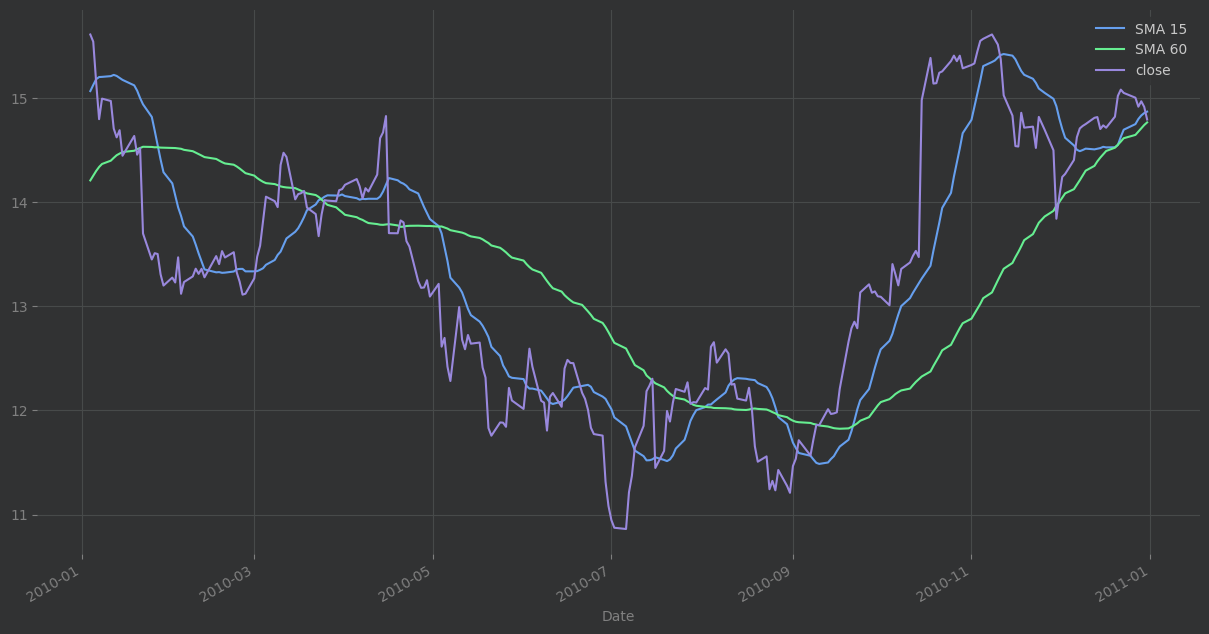

In [50]:
# Usamos ese orden para que nos salga así en la leyenda
# Ajustamos la franja temporal
# Ajustamos el gráfico del tamaño
df[["SMA 15", "SMA 60", "close"]].loc["2010"].plot(figsize=(15,8))

## Desviación estándar móvil (MSD)

In [51]:
# Volatilidad del Retorno (Moving Standar Desviation) --> calculamos la volatilidad de un día respecto al siguiente
df["returns"] = df["close"].pct_change(1) # para calcular el incremento porcentual del activo con respecto a un día de diferencia

df["MSD 15"] = df[["returns"]].rolling(15).std().shift(1) # Usamos shift(1) por lo mismo que en la SMA
df["MSD 60"] = df[["returns"]].rolling(60).std().shift(1)

In [52]:
df

,close,SMA 15,SMA 60,returns,MSD 15,MSD 60
Date,,,,,,
2004-08-19,2.499133,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.697639,NaN,NaN,0.079430,NaN,NaN
2004-08-23,2.724787,NaN,NaN,0.010064,NaN,NaN
2004-08-24,2.611960,NaN,NaN,-0.041408,NaN,NaN
2004-08-25,2.640104,NaN,NaN,0.010775,NaN,NaN
...,...,...,...,...,...,...
2023-06-15,125.790001,124.347334,112.813750,0.011336,0.014370,0.017539
2023-06-16,124.059998,124.624001,113.146250,-0.013753,0.014055,0.016966
2023-06-20,123.849998,124.604667,113.476917,-0.001693,0.013470,0.016939


<Axes: xlabel='Date'>

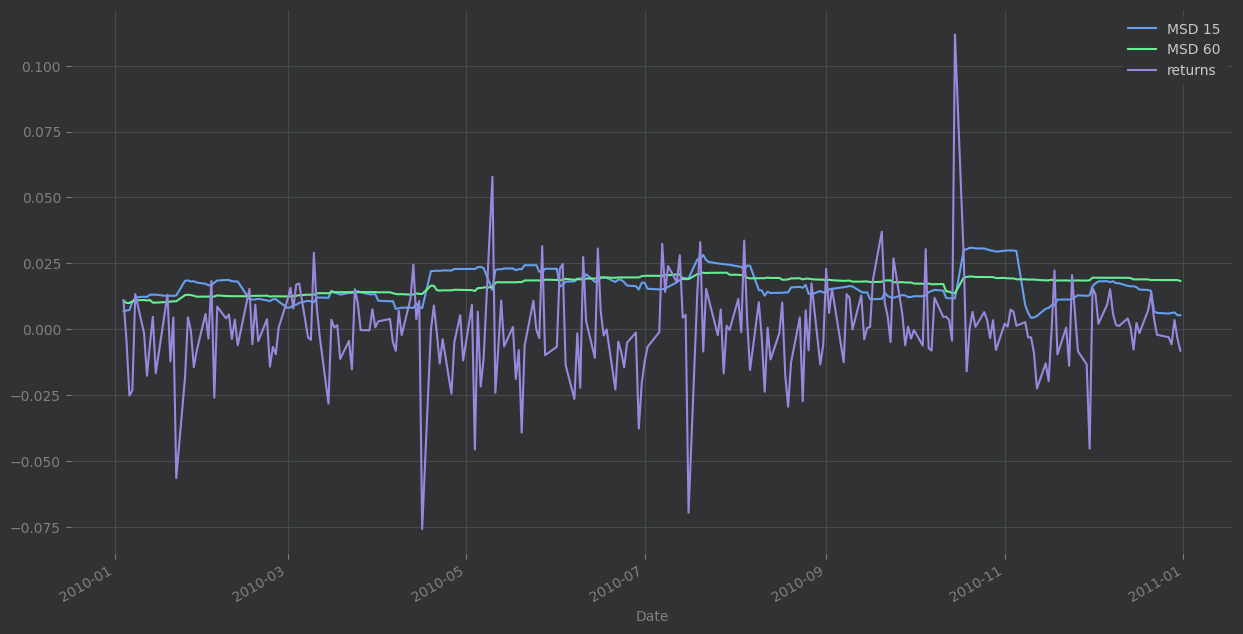

In [53]:
# Usamos ese orden para que nos salga así en la leyenda

df[["MSD 15", "MSD 60", "returns"]].loc["2010"].plot(figsize=(15,8))

# Los picos a la alza nos impactan en ambas MSD
    # Nos provocan variaciones en la desviación estándar móvil

## Índice de Fuerza Relativa (RSI) 
Librería Technical Analysis (ta)  https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html

In [54]:
import ta


In [55]:
# Importar la librería ta (tecnical analisis) 
# índice de Fuerza Relativa
RSI = ta.momentum.RSIIndicator(df["close"], window=14, fillna=False) # El valor por defecto es 14 y usamos fillna(False) para que no lo rellene
RSI

In [56]:
# Añadimos la columna de "rsi"
df["rsi"] = RSI.rsi()
df

,close,SMA 15,SMA 60,returns,MSD 15,MSD 60,rsi
Date,,,,,,,
2004-08-19,2.499133,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.697639,NaN,NaN,0.079430,NaN,NaN,NaN
2004-08-23,2.724787,NaN,NaN,0.010064,NaN,NaN,NaN
2004-08-24,2.611960,NaN,NaN,-0.041408,NaN,NaN,NaN
2004-08-25,2.640104,NaN,NaN,0.010775,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-06-15,125.790001,124.347334,112.813750,0.011336,0.014370,0.017539,63.148909
2023-06-16,124.059998,124.624001,113.146250,-0.013753,0.014055,0.016966,57.490651
2023-06-20,123.849998,124.604667,113.476917,-0.001693,0.013470,0.016939,56.825053


<Axes: xlabel='Date'>

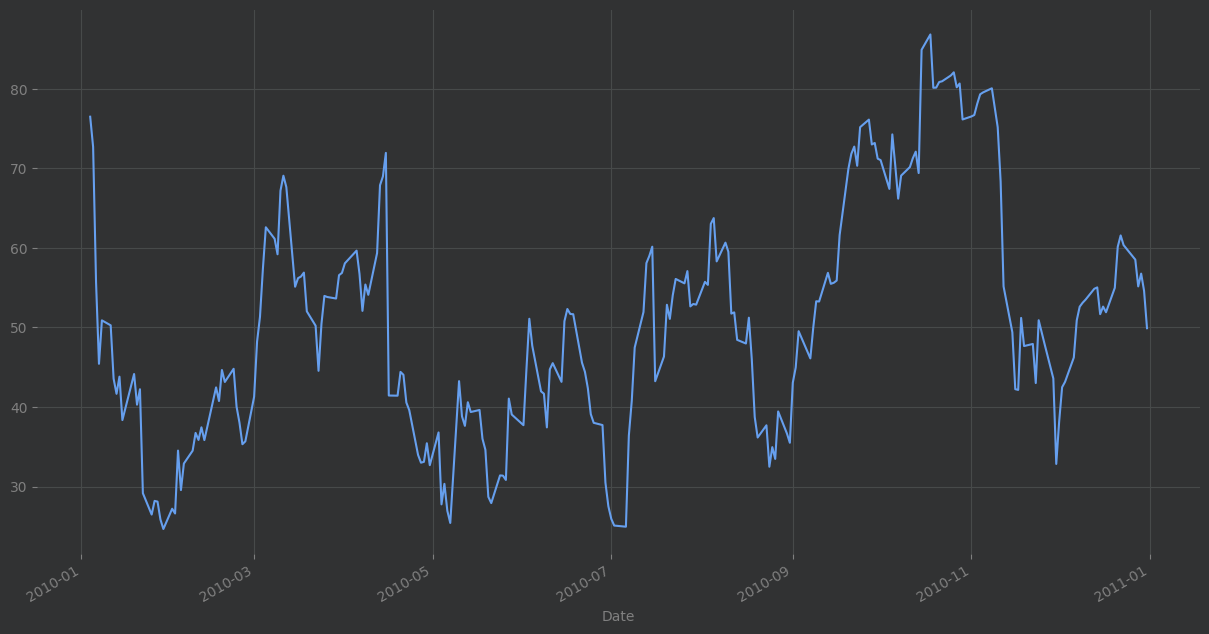

In [57]:
# La representamos
df["rsi"].loc["2010"].plot(figsize=(15,8))


## RETORNO PORCENTUAL

In [58]:
df["returns%"] = df["close"].pct_change(1)
df


,close,SMA 15,SMA 60,returns,MSD 15,MSD 60,rsi,returns%
Date,,,,,,,,
2004-08-19,2.499133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.697639,NaN,NaN,0.079430,NaN,NaN,NaN,0.079430
2004-08-23,2.724787,NaN,NaN,0.010064,NaN,NaN,NaN,0.010064
2004-08-24,2.611960,NaN,NaN,-0.041408,NaN,NaN,NaN,-0.041408
2004-08-25,2.640104,NaN,NaN,0.010775,NaN,NaN,NaN,0.010775
...,...,...,...,...,...,...,...,...
2023-06-15,125.790001,124.347334,112.813750,0.011336,0.014370,0.017539,63.148909,0.011336
2023-06-16,124.059998,124.624001,113.146250,-0.013753,0.014055,0.016966,57.490651,-0.013753
2023-06-20,123.849998,124.604667,113.476917,-0.001693,0.013470,0.016939,56.825053,-0.001693


## ENCAPSULAMOS EN UNA FUNCIÓN EL FEATURE ENGINEER

In [50]:
''' def feature_engineering(df): # este debe tener una columna con el nombre de "close"
    """ Crear nuevas variables"""
    
    # Copiamos el dataframe para evitar interferencias en los datos
    df_copy = df.copy() # copiamos el DataFrame original
    
    # Creamos el retorno porcentual con respecto al día de ayer
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Creamos las SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Crear la volatilidad
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Crear el RSI
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi()
    
    return df_copy
    '''

In [51]:
import os
import ta

In [52]:
def preprocessing_1():
    # Ruta del archivo CSV en el directorio 'data/raw'
    csv_path = os.path.join('..', 'data', 'raw', 'GOOG.csv')

    # Leer el archivo CSV en un DataFrame
    df = pd.read_csv(csv_path)

    df = df[["Adj Close"]]  # Seleccionar la columna "Adj Close" del DataFrame original
    df.columns = ["close"]  # Cambiar el nombre de la columna a "close"
    
    def feature_engineering(df):
        # Copiamos el dataframe para evitar interferencias en los datos
        df_copy = df.copy()

        # Creamos el retorno porcentual con respecto al día de ayer
        df_copy["returns"] = df_copy["close"].pct_change(1)

        # Creamos las SMAs
        df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
        df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
        
        # Crear la volatilidad
        df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
        df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
        
        # Crear el RSI
        rsi = ta.momentum.RSIIndicator(df_copy["close"], window=14, fillna=False)
        df_copy["rsi"] = rsi.rsi()
        
        return df_copy
    
'''
    # Obtener la ruta completa del directorio 'data/processed' en relación al directorio actual
    current_dir = os.path.dirname(__file__)
    processed_dir = os.path.join(current_dir, '..', 'data', 'processed')

    # Crear el directorio "data/processed" si no existe
    if not os.path.exists(processed_dir):
        os.makedirs(processed_dir)

    # Guardar el DataFrame procesado en el directorio "data/processed"
    processed_path = os.path.join(processed_dir, 'processed.csv')
    df_copy = feature_engineering(df)
    df_copy.to_csv(processed_path, index=False)

    return df_copy
 '''

preprocessing_1()

In [56]:
from sklearn.model_selection import train_test_split


In [10]:
from sklearn.metrics import mean_squared_error


In [59]:
# Leer el archivo procesado
file_path = os.path.join('..', 'data', 'processed', 'processed.csv')
df = pd.read_csv(file_path)

In [60]:
df

,close,returns,SMA 15,SMA 60,MSD 10,MSD 30,rsi
0,2.499133,NaN,NaN,NaN,NaN,NaN,NaN
1,2.697639,0.079430,NaN,NaN,NaN,NaN,NaN
2,2.724787,0.010064,NaN,NaN,NaN,NaN,NaN
3,2.611960,-0.041408,NaN,NaN,NaN,NaN,NaN
4,2.640104,0.010775,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4738,125.790001,0.011336,124.347334,112.813750,0.014889,0.016604,63.148909
4739,124.059998,-0.013753,124.624001,113.146250,0.015096,0.016618,57.490651
4740,123.849998,-0.001693,124.604667,113.476917,0.015638,0.016798,56.825053
4741,121.260002,-0.020912,124.499334,113.770083,0.015059,0.016833,49.251485


In [61]:
features = df[['SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi']]
features

,SMA 15,SMA 60,MSD 10,MSD 30,rsi
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
4738,124.347334,112.813750,0.014889,0.016604,63.148909
4739,124.624001,113.146250,0.015096,0.016618,57.490651
4740,124.604667,113.476917,0.015638,0.016798,56.825053
4741,124.499334,113.770083,0.015059,0.016833,49.251485


In [62]:
target = df['returns']
target

0            NaN
1       0.079430
2       0.010064
3      -0.041408
4       0.010775
          ...   
4738    0.011336
4739   -0.013753
4740   -0.001693
4741   -0.020912
4742    0.021524
Name: returns, Length: 4743, dtype: float64

In [69]:
# Eliminar filas con valores faltantes en las características y la variable objetivo
df.dropna(subset=['SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi', 'returns'], inplace=True)

In [64]:
df

,close,returns,SMA 15,SMA 60,MSD 10,MSD 30,rsi
60,4.533009,-0.005573,4.550095,3.392173,0.045158,0.045223,60.962970
61,4.604491,0.015769,4.565986,3.426071,0.045046,0.045295,62.484310
62,4.297392,-0.066696,4.561785,3.457852,0.044225,0.045283,52.938981
63,4.296396,-0.000232,4.546409,3.484062,0.048354,0.047390,52.910747
64,4.172859,-0.028754,4.524043,3.512136,0.048425,0.047302,49.392432
...,...,...,...,...,...,...,...
4738,125.790001,0.011336,124.347334,112.813750,0.014889,0.016604,63.148909
4739,124.059998,-0.013753,124.624001,113.146250,0.015096,0.016618,57.490651
4740,123.849998,-0.001693,124.604667,113.476917,0.015638,0.016798,56.825053
4741,121.260002,-0.020912,124.499334,113.770083,0.015059,0.016833,49.251485


In [70]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Resto del código para la regresión lineal
reg = LinearRegression()
reg.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [72]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle

In [71]:
def train_linear_regression_model():
    # Leer el archivo procesado
    file_path = os.path.join('..', 'data', 'processed', 'processed.csv')
    df = pd.read_csv(file_path)

    # Eliminar filas con valores faltantes en las características y la variable objetivo
    df.dropna(subset=['SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi', 'returns'], inplace=True)

    # Columnas de características
    features = df[['SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi']]

    # Variable objetivo
    target = df['returns']

    # División en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Resto del código para la regresión lineal
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    # Predicciones en el conjunto de prueba
    y_pred = reg.predict(X_test)

    # Calcular el MSE en el conjunto de prueba
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse}")


In [73]:
train_linear_regression_model()

MSE: 0.0003160328178046


In [54]:
def lin_reg_trading():
    # Preprocesamiento y división en conjuntos de entrenamiento y prueba
    
    dfc = preprocessing_1()

    # Columnas de características
    features = ['SMA 15', 'SMA 60', 'MSD 10', 'MSD 30', 'rsi']

    # Variable objetivo
    target = 'returns'

    # División en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(dfc[features], dfc[target], test_size=0.2, random_state=42)

    # Directorio del archivo de entrenamiento
    train_dir = os.path.join('..', 'data', 'train')

    # Crear el directorio "data/train" si no existe
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)

    # Guardar el conjunto de entrenamiento en un archivo CSV
    train_path = os.path.join(train_dir, 'X_train.csv')
    X_train.to_csv(train_path, index=False)

    # Directorio del archivo de prueba
    test_dir = os.path.join('..', 'data', 'test')

    # Crear el directorio "data/test" si no existe
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Guardar el conjunto de prueba en un archivo CSV
    test_path = os.path.join(test_dir, 'y_train.csv')
    y_train.to_csv(test_path, index=False)

    # Resto del código para la regresión lineal
    from sklearn.linear_model import LinearRegression

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    
    # Predicciones en el conjunto de prueba
    y_pred = reg.predict(X_test)

    # Calcular el MSE en el conjunto de prueba
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse}")

    # Directorio del archivo de modelos
    models_dir = os.path.join('..', 'models')

    # Crear el directorio "models" si no existe
    if not os.path.exists(models_dir):
        os.makedirs(models_dir)

    # Guardar las predicciones en formato pickle
    predictions_path = os.path.join(models_dir, 'trained_model.pkl')
    with open(predictions_path, 'wb') as file:
        pickle.dump(y_pred, file)



In [57]:
lin_reg_trading()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values